In [728]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style("darkgrid")

# Numerical Setup

In [737]:
n=100
m = 1000 # Number of measurements 
k = 10 # Number of non-zero  coefficents 
T = 50 # Number of time-steps
suppX= np.random.choice(n, k, replace=False) # s locations chosen uniformly at random
A = np.random.normal(0, 1, (m, n)) # measurement matrix
xSparse = np.zeros((n, T))
xSparse[suppX,:] = xSparse[suppX,:] = np.random.normal(0, 1, (k,T))
b = A.dot(xSparse)
max_iter = 50*k

# MMV Sparse Randomized Kaczmarz 

In [738]:
# Sparse Randomized kaczmarz algorithm for MMV

# Solve linear system Ax = b

# Inputs: 
#    A: mxn matrix
#    b: mxT vector
#    xSparse: nxT sparse solution to system
#    k: estimate of sparsity of x (setting k = n gives RK)
#    suppX: support of xSparse
#    max_iter: maximum number of iterations
# Outputs:
#    x: estimate of solution
#    err: l2 error
#    supp_rec: percentage of recovered support

# ref. "A Fast Randomized Kaczmarz Algorithm for Sparse Solutions of Consistent Linear Systems"; Mansour, Yilmaz
# Add Anna and Rachel paper

def mmvsrk(A, xSparse, b, k, suppX, max_iter):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    for iter in np.arange(max_iter):
        # Update estimate of support
        supp = np.argsort(np.linalg.norm(X, axis=1)**2, kind='mergesort')[-k:] #take the k greatest 
        
        # weights
        w = (1/np.sqrt(iter+1)) * np.ones(n)
        w[supp] = 1
        
        # choose row
        i = np.random.choice(np.arange(m), p=rowProbs)
        weighted_Ai = w*A[i,:] # weighted row i of A (element-wise product)
        
        # update x
        for tt in np.arange(T):
            dx = ((b[i,tt] - weighted_Ai.dot(X[:,tt]))/np.linalg.norm(weighted_Ai)**2)*weighted_Ai
            X[:,tt] += dx

        # compute metrics
        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(supp)))/float(ktrue)]    

    return X, err, supp_rec

In [740]:
X, err, supp_rec = mmvsrk(A, xSparse, b, int(1.5*k), suppX, max_iter)

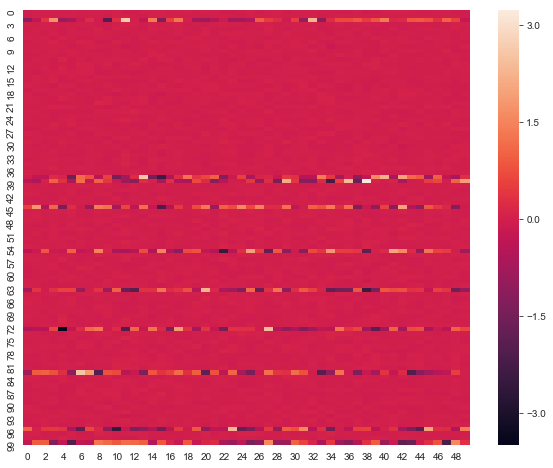

In [741]:
sns.heatmap(X)

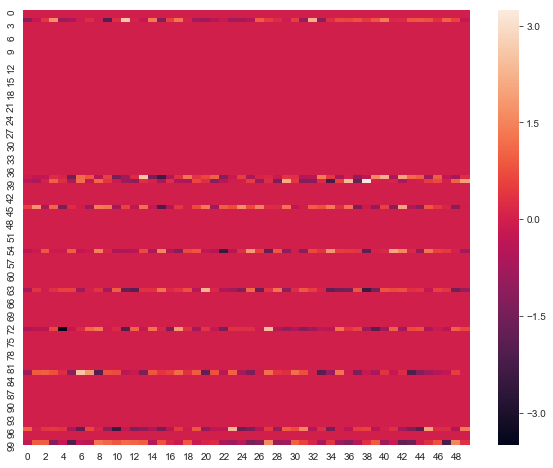

In [742]:
sns.heatmap(xSparse)

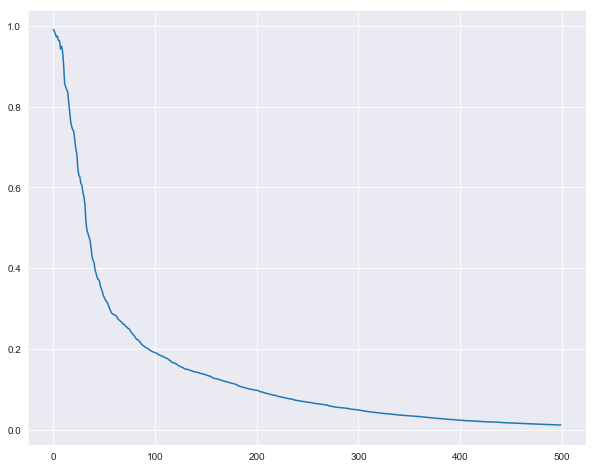

In [743]:
plt.plot(err)

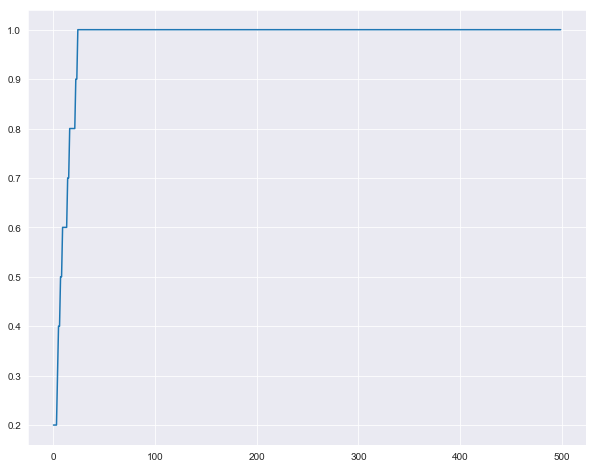

In [744]:
plt.plot(supp_rec)

## Prior Information MMV SRK